<a href="https://colab.research.google.com/github/FarahAhmedAtef/Computer-Vision-based-Autonomous-Robotic-Pick-and-Place-System/blob/main/Contouring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intensity Threshold based Contouring

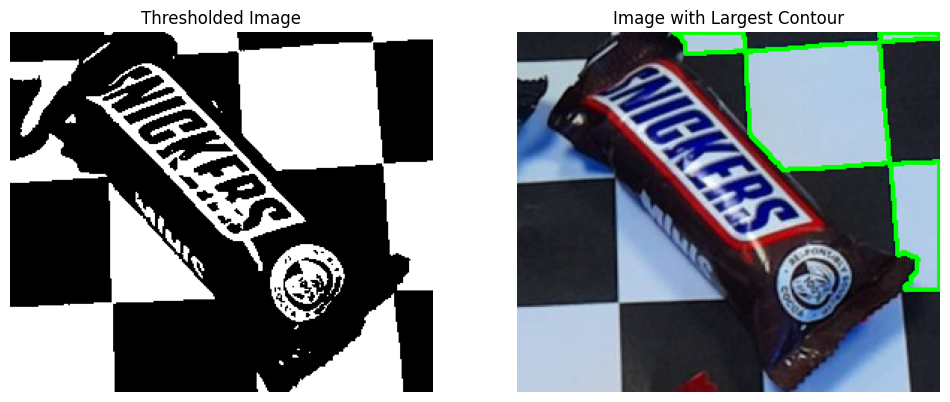

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/snicks.jpg"
roi = cv2.imread(image_path)

gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

vis_contours = roi.copy()

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(vis_contours, [largest_contour], -1, (0, 255, 0), 2)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis_contours, cv2.COLOR_BGR2RGB))
plt.title("Image with Largest Contour")
plt.axis("off")

plt.show()


# Canny Edge Detection based Contouring

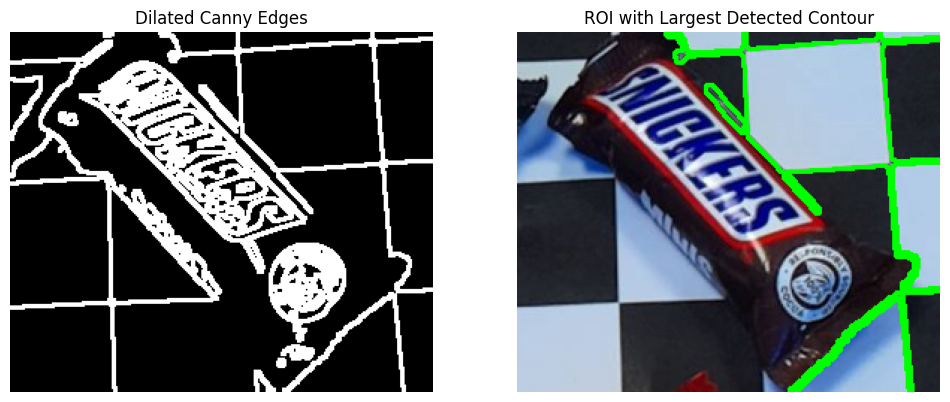

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/snicks.jpg"
roi = cv2.imread(image_path)

gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

kernel = np.ones((3, 3), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=1)

contours, hierarchy = cv2.findContours(edges_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

vis_edges = roi.copy()

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(vis_edges, [largest_contour], -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(edges_dilated, cmap='gray')
plt.title("Dilated Canny Edges")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis_edges, cv2.COLOR_BGR2RGB))
plt.title("ROI with Largest Detected Contour")
plt.axis("off")

plt.show()


# GrabCut Segmentation based Contouring

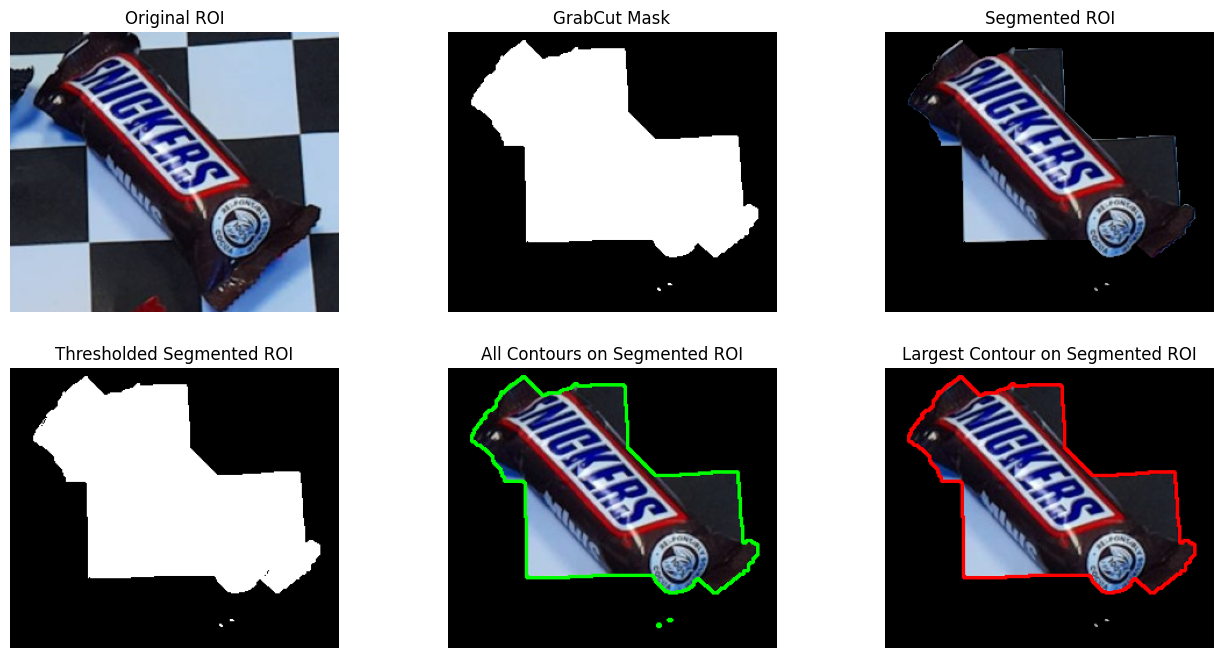

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/snicks.jpg"
roi = cv2.imread(image_path)



mask = np.zeros(roi.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (5, 5, roi.shape[1]-10, roi.shape[0]-10)

cv2.grabCut(roi, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==cv2.GC_FGD) | (mask==cv2.GC_PR_FGD), 1, 0).astype('uint8')

roi_seg = roi * mask2[:,:,np.newaxis]


gray_seg = cv2.cvtColor(roi_seg, cv2.COLOR_BGR2GRAY)
_, thresh_seg = cv2.threshold(gray_seg, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh_seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

vis_seg = roi_seg.copy()
cv2.drawContours(vis_seg, contours, -1, (0, 255, 0), 2)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    vis_largest = roi_seg.copy()
    cv2.drawContours(vis_largest, [largest_contour], -1, (0, 0, 255), 2)
else:
    vis_largest = roi_seg.copy()


plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("Original ROI")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(mask2, cmap="gray")
plt.title("GrabCut Mask")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(roi_seg, cv2.COLOR_BGR2RGB))
plt.title("Segmented ROI")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(thresh_seg, cmap="gray")
plt.title("Thresholded Segmented ROI")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(vis_seg, cv2.COLOR_BGR2RGB))
plt.title("All Contours on Segmented ROI")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(vis_largest, cv2.COLOR_BGR2RGB))
plt.title("Largest Contour on Segmented ROI")
plt.axis("off")

plt.show()
